In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
import tensorflow.keras as keras

In [2]:
from sklearn.datasets import *
from sklearn.preprocessing import minmax_scale

In [3]:
features,target = make_blobs(n_samples = 500,n_features=2,centers=2,random_state=75,cluster_std = 5)

In [4]:
features = minmax_scale(features)
k = int(len(features)*0.6)

In [17]:
X_train,Y_train = features[0:k,:],target[0:k]
X_test,Y_test = features[k:,:],target[k:]

In [22]:
X_train = np.hstack([
    X_train, np.sqrt(np.sum(X_train**2, axis = 1).reshape(-1,1))
])

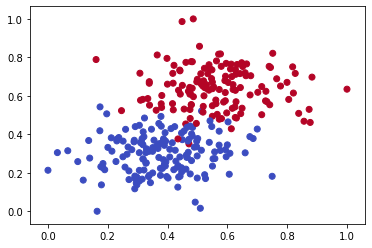

In [31]:
plt.scatter(X_train[:,0],X_train[:,1], c = Y_train, cmap = "coolwarm")
plt.show()

In [32]:
# Define data size and batch size
n_samples = 1000 
batch_size = 100
n_features = 3

In [33]:
from tqdm import tqdm

Train on 300 samples
Epoch 1/100
300/300 [==============================] - 0s 703us/sample - loss: 0.2499 - accuracy: 0.5133
Epoch 2/100
300/300 [==============================] - 0s 56us/sample - loss: 0.2496 - accuracy: 0.5200
Epoch 3/100
300/300 [==============================] - 0s 55us/sample - loss: 0.2493 - accuracy: 0.4733
Epoch 4/100
300/300 [==============================] - 0s 57us/sample - loss: 0.2490 - accuracy: 0.4700
Epoch 5/100
300/300 [==============================] - 0s 51us/sample - loss: 0.2488 - accuracy: 0.4867
Epoch 6/100
300/300 [==============================] - 0s 50us/sample - loss: 0.2485 - accuracy: 0.4733
Epoch 7/100
300/300 [==============================] - 0s 51us/sample - loss: 0.2482 - accuracy: 0.4800
Epoch 8/100
300/300 [==============================] - 0s 48us/sample - loss: 0.2479 - accuracy: 0.4800
Epoch 9/100
300/300 [==============================] - 0s 50us/sample - loss: 0.2477 - accuracy: 0.4800
Epoch 10/100
300/300 [====================

300/300 [==============================] - 0s 60us/sample - loss: 0.2316 - accuracy: 0.6833
Epoch 79/100
300/300 [==============================] - 0s 61us/sample - loss: 0.2314 - accuracy: 0.6900
Epoch 80/100
300/300 [==============================] - 0s 71us/sample - loss: 0.2312 - accuracy: 0.6867
Epoch 81/100
300/300 [==============================] - 0s 69us/sample - loss: 0.2310 - accuracy: 0.7000
Epoch 82/100
300/300 [==============================] - 0s 63us/sample - loss: 0.2308 - accuracy: 0.7000
Epoch 83/100
300/300 [==============================] - 0s 65us/sample - loss: 0.2306 - accuracy: 0.7067
Epoch 84/100
300/300 [==============================] - 0s 64us/sample - loss: 0.2304 - accuracy: 0.7233
Epoch 85/100
300/300 [==============================] - 0s 66us/sample - loss: 0.2302 - accuracy: 0.7300
Epoch 86/100
300/300 [==============================] - 0s 56us/sample - loss: 0.2300 - accuracy: 0.7367
Epoch 87/100
300/300 [==============================] - 0s 58us/samp

(0, 1)

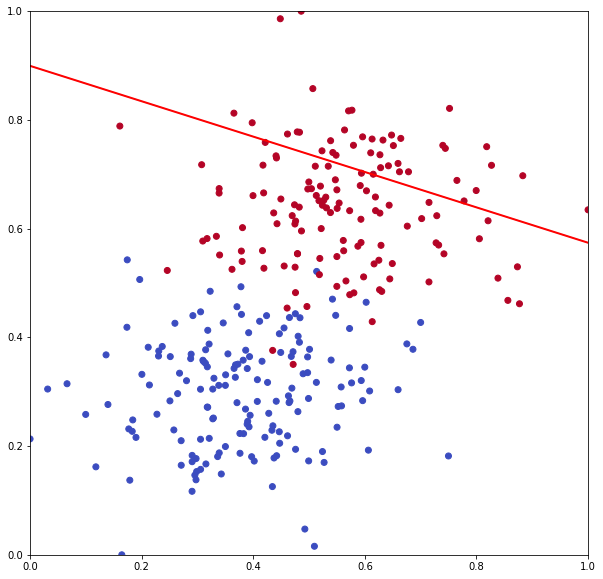

In [40]:
f,ax = plt.subplots(figsize = (10,10))
plt.scatter(X_train[:,0],X_train[:,1], c = Y_train, cmap = "coolwarm")

model = keras.models.Sequential()
model.add(keras.layers.Dense(1,input_dim = 3, activation = 'sigmoid', kernel_initializer = keras.initializers.Zeros()))
model.compile(loss = 'mse', optimizer = 'SGD', metrics = ['accuracy'])

for _i in range(1):
    model.fit(X_train,Y_train.reshape(-1,1),epochs = 100, verbose = 1)

    Weight = model.layers[0].get_weights()[0]
    Bias = model.layers[0].get_weights()[1]

    Weight_X1,Weight_X2,_ = Weight
    #print (Weight_X1, Weight_X2)
    B = Bias[0]
    
    def linear_disc(x1,wx1,wx2,bias):
        return (-wx1*x1 + (-bias))/(wx2)


    g = np.linspace(0,1,10)
    gp = linear_disc(g,Weight_X1[0],Weight_X2[0],B)

    if _i % 25 == 0:
        plt.plot(g,gp, linewidth = 1, alpha = 0.5)
    elif _i < 50:
        if _i % 5 == 0:
            plt.plot(g,gp, linewidth = 1)
        
plt.plot(g,gp, linewidth = 2, alpha = 1, c = 'r')
plt.xlim([0,1])
plt.ylim([0,1])